In [2]:
import pandas as pd
import numpy as np
import sympy as sym
import scipy as sci
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
def Std(a):
    sqr = np.sum((a - a.mean())**2)
    return np.sqrt(sqr/(len(a) - 1))

def Mean(a):
    mean = np.sum(a)/len(a)
    return mean

In [4]:
ambiental = pd.read_csv("Ambiental 1min.csv",sep=";")
bloqueos = pd.read_csv("Bloqueos 5min.csv",sep=";")
distanciafija = pd.read_csv("Distancia 5cm.csv",sep=";")
distanciavar = pd.read_csv("Distancias varias 1 min.csv",sep=";")

# Datos de ambiente

In [5]:
ambiental_5min = ambiental["Ambiente 5min"].to_numpy()
ambiental_5min

array([15, 14, 19, 14, 11], dtype=int64)

In [6]:
prom_ambiente = Mean(ambiental_5min)
prom_ambiente

14.6

In [7]:
un_ambiente = Std(ambiental_5min)
un_ambiente

2.8809720581775866

# Datos de distancia fija a diferentes tiempos

In [8]:
prom_distancia_fija = np.array([0.,0.,0.])
un_distancia_fija = np.array([0.,0.,0.])

In [9]:
distnacia_fija1min = distanciafija["1min"]
prom_distancia_fija1min = Mean(distnacia_fija1min)
std_distancia_fija1min = Std(distnacia_fija1min)

prom_distancia_fija[0] = prom_distancia_fija1min
un_distancia_fija[0] = std_distancia_fija1min

prom_distancia_fija1min,std_distancia_fija1min

(129.33333333333334, 10.016652800877813)

In [10]:
distnacia_fija3min = distanciafija["3min"]
prom_distancia_fija3min = Mean(distnacia_fija3min)
std_distancia_fija3min = Std(distnacia_fija3min)

prom_distancia_fija[1] = prom_distancia_fija3min
un_distancia_fija[1] = std_distancia_fija3min

prom_distancia_fija3min,std_distancia_fija3min

(381.6666666666667, 7.505553499465135)

In [11]:
distnacia_fija5min = distanciafija["5min"]
prom_distancia_fija5min = Mean(distnacia_fija5min)
std_distancia_fija5min = Std(distnacia_fija5min)

prom_distancia_fija[1] = prom_distancia_fija5min
un_distancia_fija[1] = std_distancia_fija5min

prom_distancia_fija5min,std_distancia_fija5min

(645.0, 5.0)

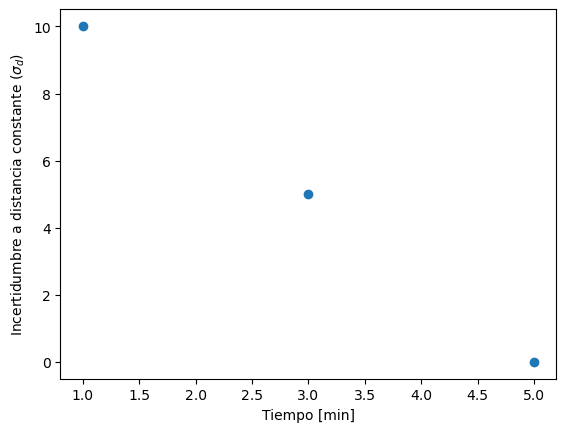

In [12]:
plt.scatter([1,3,5],un_distancia_fija)
plt.xlabel("Tiempo [min]")
plt.ylabel(r"Incertidumbre a distancia constante ($\sigma_d$)")
plt.savefig("incertidumbrevstiempo.pdf")

# Datos a distancia variante y mismos tiempos

In [13]:
distancias = np.array([2.,4.,6.,8.,10.])
counts = np.zeros_like(distancias)
std = np.zeros_like(distancias)
j = 0
for i in distancias:
    counts[j] = Mean(distanciavar["%s cm"%(int(i))].to_numpy())
    std[j] = Std(distanciavar["%s cm"%(int(i))].to_numpy())
    j +=1 
    
counts,std

(array([355.  , 173.75, 100.  ,  61.75,  44.25]),
 array([11.10555417, 21.42234036, 12.27463509,  3.20156212,  2.62995564]))

(array([779.11298838, -30.94746568]), array([21.20888784,  5.73740818]))

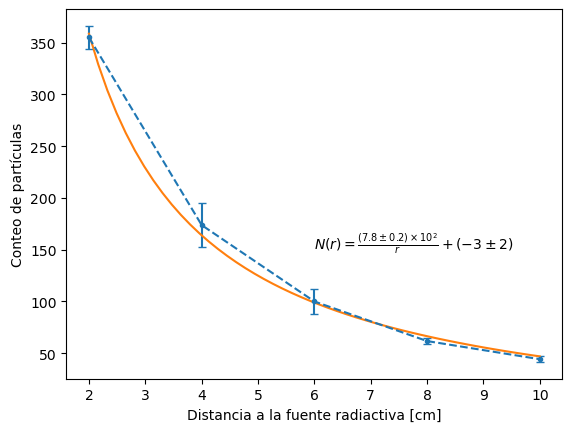

In [46]:
plt.errorbar(distancias,counts,yerr=std,capsize=3,fmt=".--")
plt.ylabel("Conteo de partículas")
plt.xlabel("Distancia a la fuente radiactiva [cm]")

def overR(x,a,b):
    return a/x + b

param,cov = optimize.curve_fit(overR,distancias,counts)

r = np.linspace(distancias[0],distancias[-1])
y = overR(r,param[0],param[1])
plt.plot(r,y)
plt.text(6,150,r"$N(r) = \frac{(7.8 \pm 0.2)\times10^2}{r} + (-3 \pm 2 )$")
plt.savefig("distnacia_var.pdf")
param,np.sqrt(np.diag(cov))

# Datos con los bloqueadores de emisión

In [47]:
plomo = bloqueos["Plomo"].to_numpy()
alumnio = bloqueos["Aluminio"].to_numpy()
papel = bloqueos["Papel"].to_numpy()
nada = distnacia_fija5min

data = [plomo,alumnio,nada,papel]

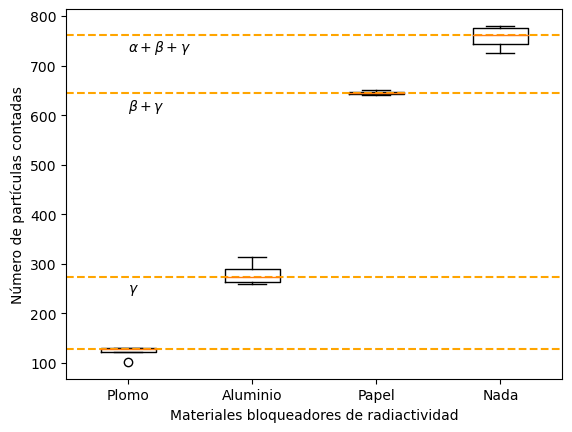

In [48]:
plt.boxplot(data,labels=["Plomo","Aluminio","Papel","Nada"])
plt.axhline(linestyle="--",y=128,color="orange")
plt.axhline(linestyle="--",y=273,color="orange")
plt.axhline(linestyle="--",y=762,color="orange")
plt.axhline(linestyle="--",y=645,color="orange")

plt.ylabel("Número de partículas contadas")
plt.xlabel("Materiales bloqueadores de radiactividad")
plt.text(1,730,r"$ \alpha + \beta + \gamma$")
plt.text(1,243,r"$ \gamma$")
plt.text(1,610,r"$ \beta + \gamma$")

plt.savefig("block.pdf")

# Cálculo aproximado de la vida media de la partícula

Teniendo en cuenta que la desintegración está dada por la fórmula $$ \frac{\text{d}N}{\text{d}t} = -\lambda N$$ se puede obtener un fórmula para vida media de una partícula. Que estaría dada por $$\Delta N = -\lambda N \Delta t$$